#**Predicting Breast Cancer in a patient**

##Abstract:
#### --> Breast cancer represents one of the diseases that make a high number of deaths every year.
-->It is the most common type of all cancers and the main cause of women's deaths worldwide.
--> Classification and data mining methods are an effective way to classify data.
--> Especially in the medical field, where those methods are widely used in diagnosis and analysis to make decisions.

##**Problem Statement:**

--> Given the details of cell nuclei taken from breast mass, predict whether or not a patient has breast cancer using the Ensembling Techniques.
--> Perform necessary exploratory data analysis before building the model and evaluate the model based on performance metrics other than model accuracy.

###Dataset Information:
The dataset consists of several predictor variables and one target variable, Diagnosis.
The target variable has values 'Benign' and 'Malignant', where 'Benign' means that the cells are not harmful or there is no cancer and 'Malignant' means that the patient has cancer and the cells have a harmful effect

###Variable Description:

###Column Description

--> radius Mean of distances from center to points on the perimeter
--> texture Standard deviation of gray-scale values
--> perimeter Observed perimeter of the lump
--> area Observed area of lump
--> smoothness Local variation in radius lengths
--> compactness perimeter^2 / area - 1.0
--> concavity Severity of concave portions of the contour
--> concave points number of concave portions of the contour
--> symmetry Lump symmetry
--> fractal dimension "coastline approximation" - 1
--> Diagnosis Whether the patient has cancer or not? ('Malignant','Benign')


The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.
For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

###Scope:

● Analysing the available data and exploring relationships among given variables

● Data Pre-processing

● Training SVM classifier to predict whether the patient has cancer or not

● Assess the correctness in classifying data with respect to efficiency and effectiveness of the SVM classifier in terms of accuracy, precision sensitivity, specificity and AUC ROC

● Tuning the hyperparameters of SVM Classifier provided by the scikit-learn library

#**Learning Outcome:**
The students will get a better understanding of how the variables are linked to each other and build an SVM model. Apart from various performance measures, they will also learn about hyperparameter tuning with cross-validation to improve these scores.

#Importing all required Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import time
import seaborn as sns

###Load Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/JOHANDILEEP21/Mini-Projects/main/cancer.csv', index_col=False)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In here, The unnamed: 32 column has a large amount of null values. Id is not the major features as working with this data. So we should drop the column.

In [ ]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)

After removed the column. Check the shape of the DataFrame.

In [ ]:
df.shape

(569, 31)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
df.shape

(569, 31)

###Converting the Diagnosis column string into binarical representaion

First thing to do is to enumerate the diagnosis column such that M = 1, B = 0.


In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

Let's take a look at the number of Benign and Maglinant cases from the dataset.

From the output shown below, majority of the cases are benign (0).

In [ ]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
print(df.groupby('diagnosis')[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']].size())

diagnosis
0    357
1    212
dtype: int64


##Finding the Outliers
### Working with the outliers

In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
((df < (q1 - 1.5 * iqr))|(df > (q3 +1.5*iqr))).sum()

diagnosis                   0
radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

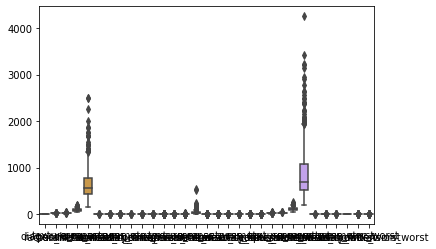

In [ ]:
sns.boxplot(data=df)

Next, we visualise the data using density plots to get a sense of the data distribution.

From the outputs below, you can see the data shows a general gaussian distribution.

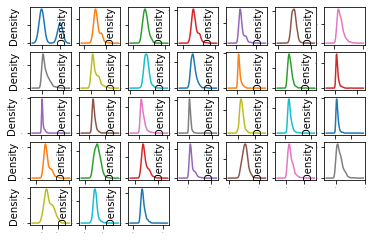

In [ ]:
df.plot(kind='density', subplots=True, layout=(5,7),sharex=False,legend=False, fontsize=1, figsize=(15,15))
plt.show()

It is good to check the correlations between the attributes.

From the output graph above, The red around the diagonal suggests that attributes are correlated with each other.

The yellow and green patches suggest some moderate correlation and the blue boxes show negative correlations.

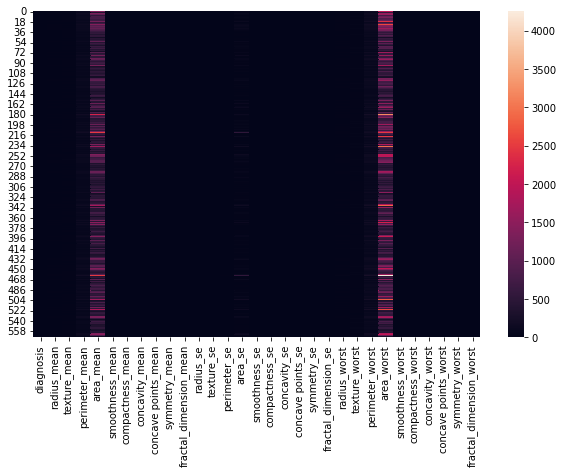

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df)
plt.show()

In [ ]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


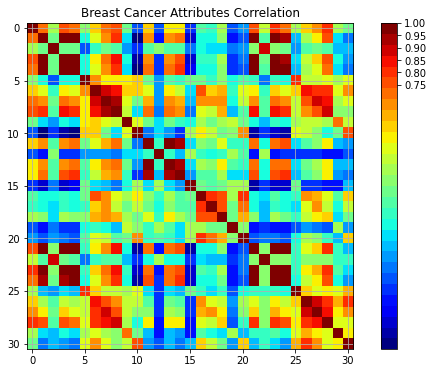

In [ ]:
from matplotlib import cm
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation='none', cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
#Add colorbar, make sure to specify the tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.9,.95,1])
plt.show()

Finally, we'll split the data into predictor variables and target variable, following by breaking them into train and test sets.

We will use 30% of the data as test set.

In [ ]:
X = df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [ ]:
# X = sorted(X)
# X

In [ ]:
X.shape

(569, 30)

In [ ]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
import plotly.express as px

plt.figure(figsize=(10,6))
fig = px.scatter_3d(df, x='radius_mean', y='radius_se', z='radius_worst',color='diagnosis')
fig.show()

<Figure size 720x432 with 0 Axes>

In [ ]:
# fig = px.scatter_3d(df, x=X.iloc[:,0], y=X.iloc[:,1], z=X.iloc[:,2],color='diagnosis')
# fig.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
def capp(df, cols):
  for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    up = q3+(1.5*iqr)
    low = q1 - (1.5*iqr)
    df[col] = np.where(df[col]>up, up, np.where(df[col]<low, low, df[col]))


In [ ]:
cols = X_train.columns
capp(X_train, cols)

In [ ]:
def capping(df,cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Up=Q3 + (1.5 * IQR)
        Low=Q1 - (1.5 * IQR)

        df[col]=np.where(df[col]> Up,Up,np.where(df[col]<Low,Low,df[col]))

In [ ]:
cols = X_train.columns

In [ ]:
cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
capping(X_train, cols)

In [ ]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.042167,19.102619,91.486379,635.864730,0.097624,0.105889,0.088817,0.049241,0.182774,0.063268,...,16.188746,25.481241,106.894878,844.154271,0.134261,0.258801,0.277530,0.117471,0.290402,0.084742
std,3.344909,4.086274,23.114076,302.060807,0.013709,0.050274,0.074972,0.037706,0.027097,0.006675,...,4.565539,5.888536,32.102713,461.465541,0.021962,0.148765,0.202188,0.067101,0.055857,0.016487
min,7.691000,9.710000,47.980000,170.400000,0.062510,0.019380,0.000000,0.000000,0.109750,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.710000,16.172500,75.222500,420.300000,0.087720,0.067015,0.031503,0.020795,0.162250,0.058720,...,13.010000,21.042500,84.572500,514.325000,0.120625,0.149100,0.121400,0.065330,0.251500,0.072790
50%,13.390000,18.635000,86.290000,552.050000,0.096865,0.097635,0.061680,0.034605,0.181150,0.062230,...,14.975000,25.180000,98.115000,688.750000,0.132950,0.223950,0.231400,0.102300,0.281850,0.081490
75%,15.745000,21.585000,103.700000,771.775000,0.106450,0.131675,0.132250,0.070582,0.197250,0.066947,...,18.540000,29.390000,124.825000,1041.750000,0.147800,0.350775,0.396075,0.166200,0.321375,0.093520
max,21.797500,29.703750,146.416250,1298.987500,0.134545,0.228665,0.283371,0.145264,0.249750,0.079289,...,26.835000,41.911250,185.203750,1832.887500,0.188562,0.653288,0.808088,0.291000,0.426187,0.124615


In [ ]:
q1 = X_train.quantile(0.25)
q3 = X_train.quantile(0.75)
iqr = q3 - q1
df1 = ((X_train < (q1 - 1.5 * iqr))|(X_train > (q3 +1.5*iqr))).sum()

In [ ]:
df1

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

###Scaling the data

In [ ]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import matplotlib.pyplot as plt
# plotting scatters
for i in range(0,6):
  plt.scatter(X.iloc[:, i], X.iloc[:, i+1], c=y, s=50, cmap='spring');
  plt.show()

## EDA (Exploratory Data Analysis)

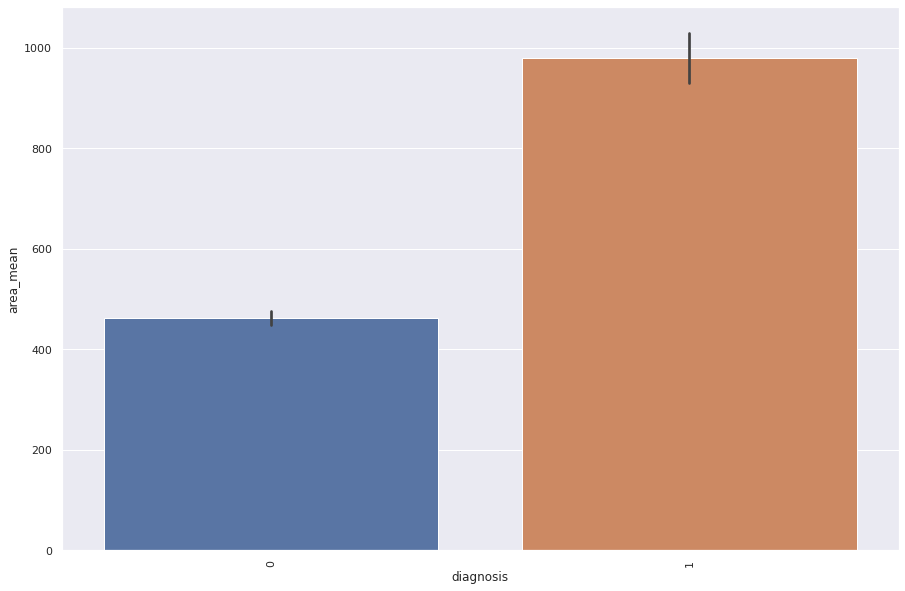

In [ ]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=df, y=df['area_mean'], x=df['diagnosis'])
ax.tick_params(axis='x', rotation=90)

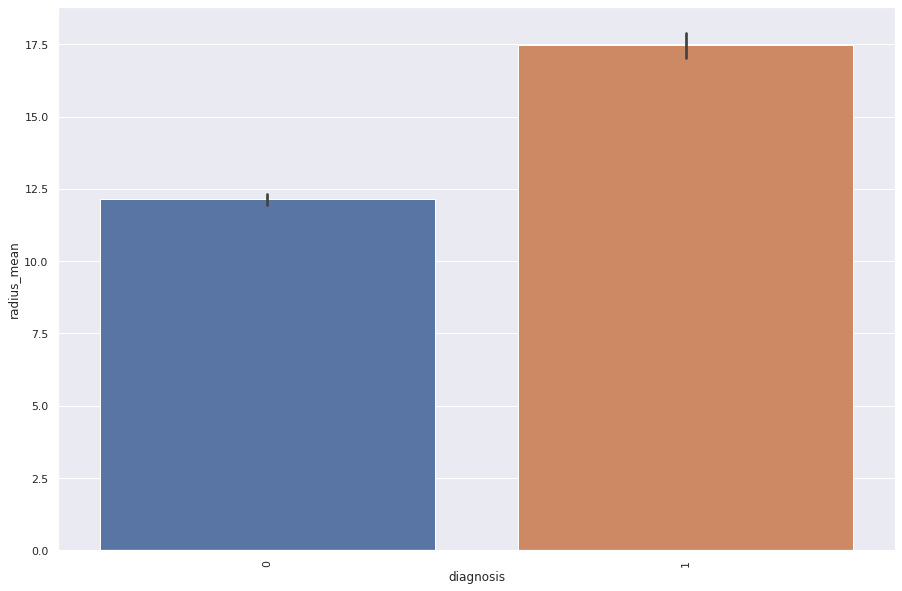

In [ ]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=df, y=df['radius_mean'], x=df['diagnosis'])
ax.tick_params(axis='x', rotation=90)

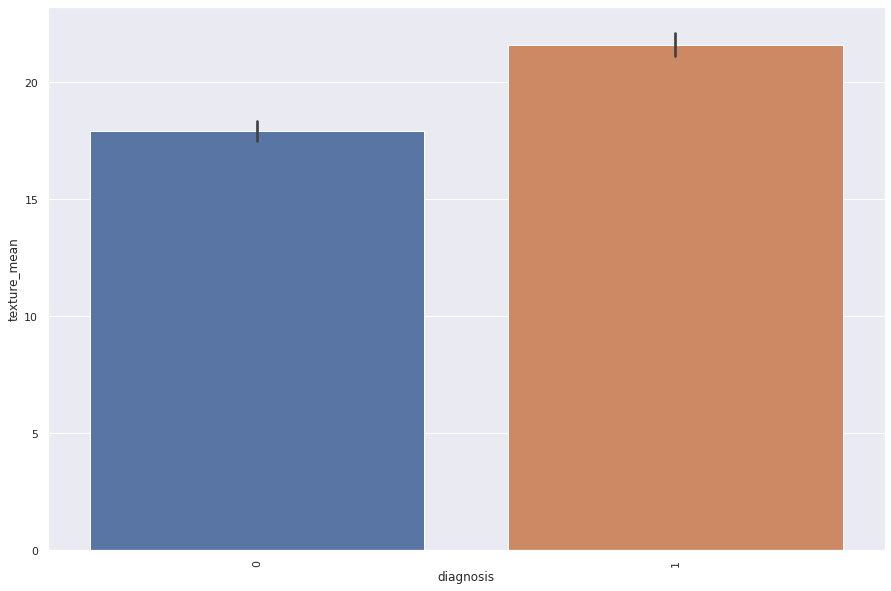

In [ ]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=df, y=df['texture_mean'], x=df['diagnosis'])
ax.tick_params(axis='x', rotation=90)

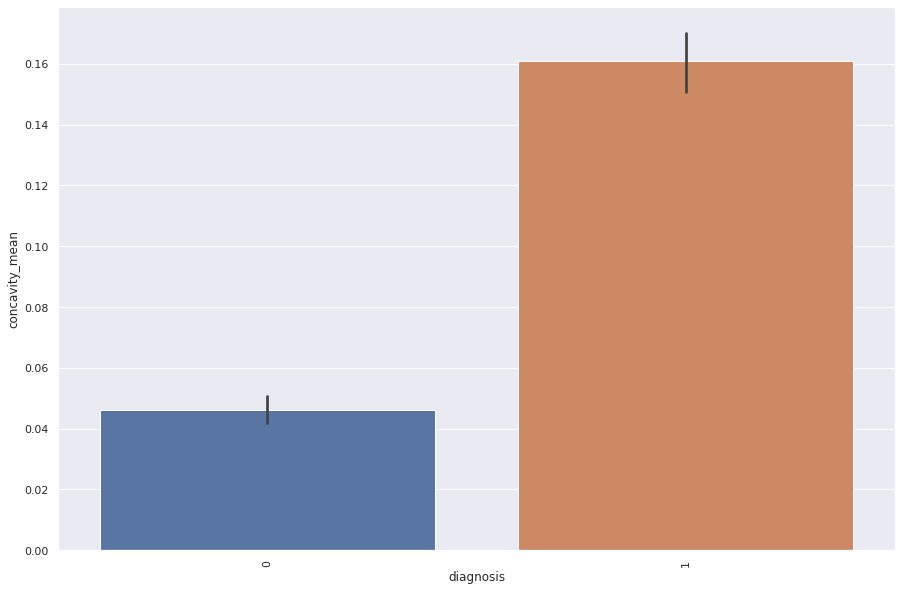

In [ ]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=df, y=df['concavity_mean'], x=df['diagnosis'])
ax.tick_params(axis='x', rotation=90)

##Baseline Algorithm Checking

---

From the dataset, we will analysis and build a model to predict if a given set of symptoms lead to breast cancer.

This is a binary classification problem, and a few algorithms are appropriate for use.

Since we do not know which one will perform the best at the point, we will do a quick test on the few appropriate algorithms with default setting to get an early indication of how each of them perform.

We will use 10 fold cross validation for each testing.

---



The following linear algorithms will be used, namely:

**Logisic Regression**

**Classification and Regression Trees (CART)**

**Linear Support Vector Machines (SVM)**

**Gaussian Naive Bayes (NB)**

**k-Nearest Neighbors (KNN).**

In [ ]:
models_list = []
models_list.append(('Logistic', LogisticRegression()))
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVC', SVC()))
models_list.append(('GAUSSIAN NAIVE BAYES', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [ ]:
models_list

[('Logistic', LogisticRegression()),
 ('CART', DecisionTreeClassifier()),
 ('SVC', SVC()),
 ('GAUSSIAN NAIVE BAYES', GaussianNB()),
 ('KNN', KNeighborsClassifier())]

In [ ]:
num_folds = 10
results = []
names =[]
for name, model in models_list:
  kfold = KFold(n_splits=num_folds, shuffle=True)
  start = time.time()
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
  end = time.time()
  results.append(cv_results)
  names.append(name)
  print("%s: %f (%f) (runtime: %f)" % (name, cv_results.mean(), cv_results.std(),end-start))

Logistic: 0.969872 (0.021915) (runtime: 0.137951)
CART: 0.924423 (0.040881) (runtime: 0.081617)
SVC: 0.974744 (0.022651) (runtime: 0.054447)
GAUSSIAN NAIVE BAYES: 0.931987 (0.039580) (runtime: 0.018847)
KNN: 0.967372 (0.019478) (runtime: 0.062011)


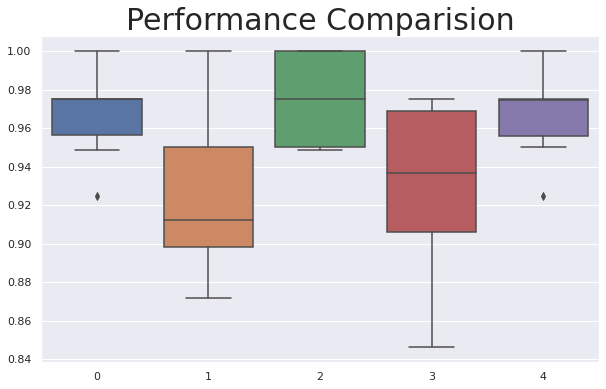

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Performance Comparision', fontsize=30)
sns.boxplot(data=results)

In [ ]:
# fig = plt.figure()
# fig.suptitle('Peroformece Comparision')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

From the initial run, it looks like few performed the best given the dataset (all above 92% mean accuracy).

Support Vector Machine has a surprisingly bad performance here.

However, if we standardise the input dataset, it's performance should improve.

##Evaluation of algorithm on Standardised Data

---


The performance of the few machine learning algorithm could be improved if a standardised dataset is being used.

The improvement is likely for all the models.

I will use pipelines that standardize the data and build the model for each fold in the cross-validation test harness.

That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [ ]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledLogistic', Pipeline([('Scaler', StandardScaler()), ('Logistic', LogisticRegression())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))

results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, shuffle=True)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledLogistic: 0.967500 (0.033634) (run time: 0.144742)
ScaledCART: 0.926987 (0.031097) (run time: 0.093645)
ScaledSVC: 0.977500 (0.017500) (run time: 0.059999)
ScaledNB: 0.931987 (0.036285) (run time: 0.025080)
ScaledKNN: 0.962372 (0.030160) (run time: 0.057838)


In [ ]:
#plt.figure(figsize=(10,10))
#plt.title('Performance Comparision')
#ax = fig.add_subplot(111)
#sns.boxplot(data=results)
#ax.set_xticklabels(names)

In [ ]:
# fig = plt.figure()
# fig.suptitle('Performence Comparision')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(X_train, y_train, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain = X_train[:, :2] # we only take the first two features.

#================================================================
# Create color maps
#================================================================
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#================================================================
# we create an instance of SVM and fit out data.
# We do not scale ourdata since we want to plot the support vectors
#================================================================

C = 1.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)
sig_svc = SVC(kernel='sigmoid',random_state=33, gamma='auto', C=C).fit(Xtrain, y_train)

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams['axes.titlesize'] = 'large'

    # create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with sigmoid kernel']

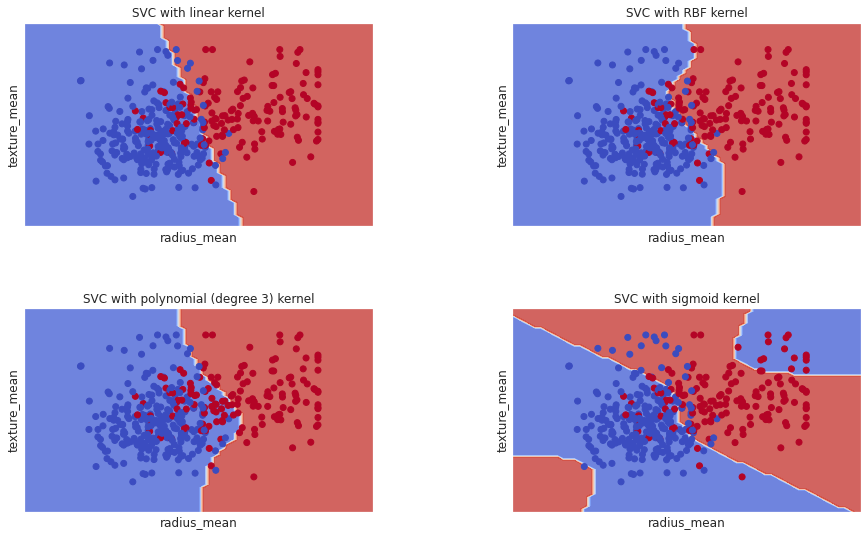

In [ ]:
for i, clf in enumerate((svm, rbf_svc, poly_svc, sig_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

Notice the drastic improvement of SVM after using scaled data.

Next, we'll fine tune the performance of SVM by tuning the algorithm

##Algorithm Tuning - Tuning SVM

---


We will focus on SVM for the algorithm tuning. We can tune two key parameter of the SVM algorithm - the value of C and the type of kernel.

The default C for SVM is 1.0 and the kernel is Radial Basis Function (RBF).

We will use the grid search method using 10-fold cross-validation with a standardized copy of the sample training dataset. We will try over a combination of C values and the following kernel types 'linear', 'poly', 'rbf' and 'sigmoid

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982500 using {'C': 1.3, 'kernel': 'rbf'}
0.967436 (0.019502) with: {'C': 0.1, 'kernel': 'linear'}
0.839231 (0.063391) with: {'C': 0.1, 'kernel': 'poly'}
0.944744 (0.034967) with: {'C': 0.1, 'kernel': 'rbf'}
0.944744 (0.021742) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.972436 (0.023579) with: {'C': 0.3, 'kernel': 'linear'}
0.864231 (0.042508) with: {'C': 0.3, 'kernel': 'poly'}
0.959872 (0.027771) with: {'C': 0.3, 'kernel': 'rbf'}
0.967372 (0.022459) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.972436 (0.023579) with: {'C': 0.5, 'kernel': 'linear'}
0.876795 (0.034728) with: {'C': 0.5, 'kernel': 'poly'}
0.972436 (0.020760) with: {'C': 0.5, 'kernel': 'rbf'}
0.974872 (0.015813) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.969872 (0.024602) with: {'C': 0.7, 'kernel': 'linear'}
0.879295 (0.031675) with: {'C': 0.7, 'kernel': 'poly'}
0.979936 (0.018726) with: {'C': 0.7, 'kernel': 'rbf'}
0.972308 (0.017660) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.964744 (0.025777) with: {'C': 0.9, 'kernel': 'linear'

We can see the most accurate configuration was SVM with an RBF kernel and C=1.3, with the high accuracy.

###Application of SVC on dataset

Let's fit the SVM to the dataset and see how it performs given the test data.

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='rbf')
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.004858


In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [ ]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy score 0.976608
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



<Figure size 720x432 with 0 Axes>

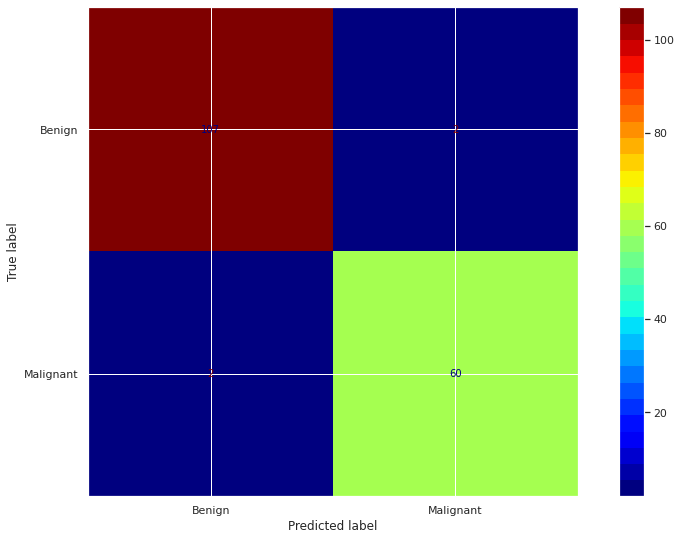

In [ ]:
display_labels=['Benign','Malignant']
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

In [ ]:
print(confusion_matrix(y_test, predictions))

[[107   2]
 [  2  60]]


We can see that we achieve a high accuracy on the held-out test dataset.

From the confusion matrix, there is only 1 case of mis-classification.

The performance of this algorithm is expected to be high given the symptoms for breast cancer should exchibit certain clear patterns.

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='sigmoid')
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.007135


In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [ ]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy score 0.959064
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       109
           1       0.97      0.92      0.94        62

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



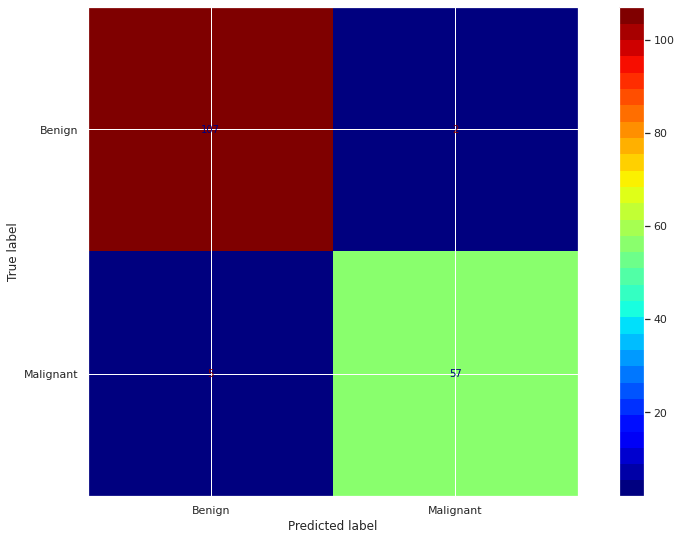

In [ ]:
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

Run Time: 0.010565
Accuracy score 0.941520
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       109
           1       0.98      0.85      0.91        62

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



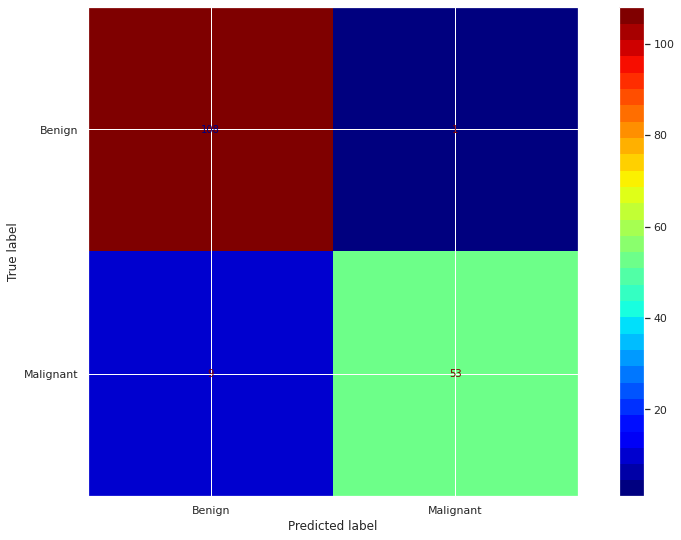

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='poly')
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

Run Time: 0.007638
Accuracy score 0.988304
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       109
           1       1.00      0.97      0.98        62

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



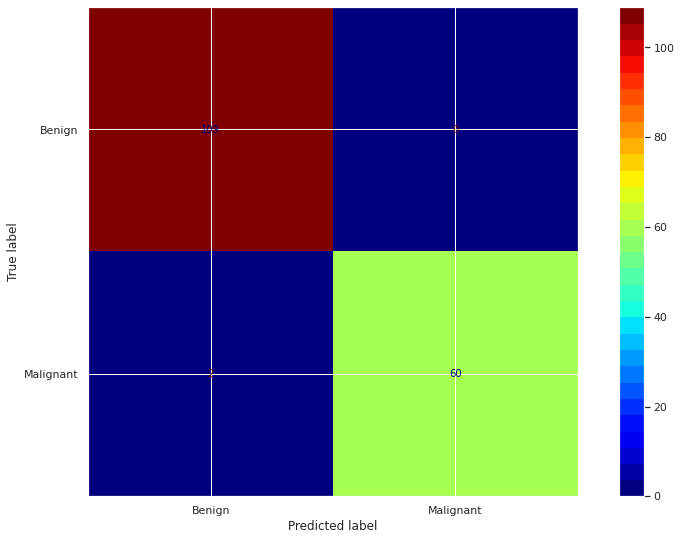

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='linear')
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# X = df.iloc[1:3]
# y = df.diagnosis

# ## Plotting
# x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
# y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
# h = (x_max / x_min)/100
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# X_plot = np.c_[xx.ravel(), yy.ravel()]

# ## Creating the linear kernel
# C = 1.0
# svc_classifier = svm.SVC(kernel='linear', C=C).fit(X, y)

# Z = svc_classifier.predict(X_plot)
# Z = Z.reshape(xx.shape)

# ## Code of plotting
# plt.figure(figsize=(15, 5))
# plt.subplot(121)
# plt.contourf(xx, yy, Z, alpha=0.3)
# plt.set_cmap("gist_rainbow")
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.xlim(xx.min(), xx.max())
# plt.title('Support Vector Classifier with linear kernel')

In [ ]:
#plt.scatter_3d(data=df, x=x, y=x, z = x*y)

Run Time: 0.023358
Accuracy score 0.976608
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       109
           1       0.98      0.95      0.97        62

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



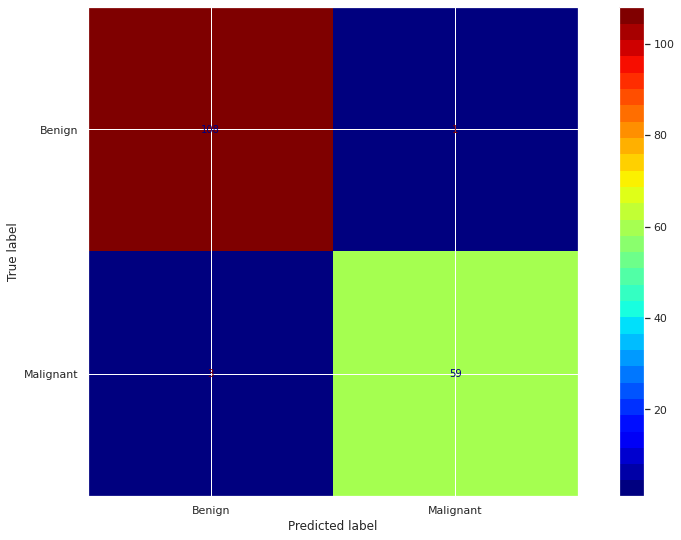

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = LogisticRegression()
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



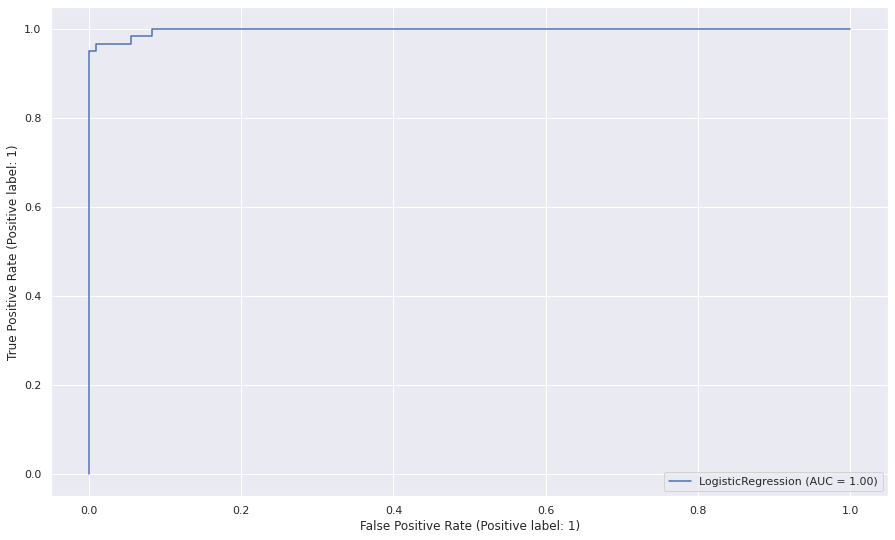

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
#f1_score(y_test,log_reg.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, y_test_predictions, pos_label=2)
#plot_roc_curve(predictions, X_test, y_test)

plot_roc_curve(model,X_test,y_test) # - Syntax : plot_roc_curve(model,fts_of_test, target_of_test)

In [ ]:
confusion_matrix(y_test, predictions)

array([[108,   1],
       [  3,  59]])

In [ ]:
f1_score(y_test, predictions)

0.9672131147540983

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=2)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



In [ ]:
roc_auc_score(y_test, predictions)

0.9712192956496005